<a href="https://colab.research.google.com/github/liah12345/FIFA-Winner/blob/main/FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings('ignore')

In [ ]:
# Read the International matches data from drive
FIFA = pd.read_csv('/content/drive/MyDrive/LD7187MachineLearning/international_matches.csv')

In [ ]:
FIFA.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
FIFA.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
# Best performing teams with top FIFA rank
Fifa_rank = FIFA[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = Fifa_rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = Fifa_rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
Fifa_rank = pd.concat([home,away])

# Selected countries and latest matches
Fifa_rank = Fifa_rank.sort_values(['team','date'],ascending=[True,False])
Fifa_rank_10 = Fifa_rank.groupby('team').first().sort_values('rank',ascending=True)[0:10].reset_index()
Fifa_rank_10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


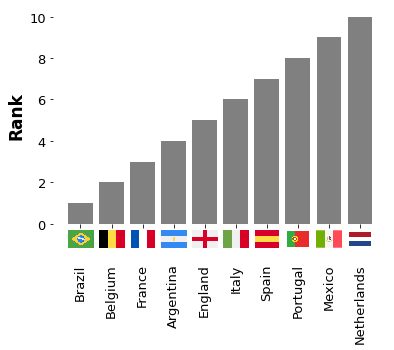

In [ ]:
#Top Ten Teams and Ranks
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
def get_flag(name):
    path = "/content/drive/MyDrive/LD7187MachineLearning/Flags/{}.png".format(name.title())
    im = plt.imread(path)
    return im
def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False, xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)
  
countries = ["Brazil", "Belgium", "France", "Argentina", "England" ,"Italy", "Spain", "Portugal","Mexico", "Netherlands"]
valuesA = [1, 2, 3,4,5,6,7,8,9,10]
fig, ax = plt.subplots()
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
#plt.xlabel('Countries',fontsize = 15,weight = 'bold')
plt.ylabel('Rank',fontsize = 17, weight = 'bold')
ax.bar(range(len(countries)), valuesA, width=0.8,align="center" , color = 'grey')
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.tick_params(axis='x', which='major', pad=36)
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)
for i, c in enumerate(countries):
    offset_image(i, c, ax)


In [ ]:
# Winning percentage of Best teams
def home_percentage(team):
    score = len(FIFA[(FIFA['home_team'] == team) & (FIFA['home_team_result'] == "Win")]) / len(FIFA[FIFA['home_team'] == team]) * 100
    return round(score)
def away_percentage(team):
    score = len(FIFA[(FIFA['away_team'] == team) & (FIFA['home_team_result'] == "Lose")]) / len(FIFA[FIFA['away_team'] == team]) * 100
    return round(score)
Fifa_rank_10['Home_win_Per'] = np.vectorize(home_percentage)(Fifa_rank_10['team'])
Fifa_rank_10['Away_win_Per'] = np.vectorize(away_percentage)(Fifa_rank_10['team'])
Fifa_rank_10['Average_win_Per'] = round((Fifa_rank_10['Home_win_Per'] + Fifa_rank_10['Away_win_Per'])/2)
Fifa_rank_win = Fifa_rank_10.sort_values('Average_win_Per',ascending=False)
Fifa_rank_win
Fifa_rank_win_10 = Fifa_rank_win.groupby('team').first().sort_values('Average_win_Per',ascending=False)[0:10].reset_index()
Fifa_rank_win_10


,team,date,rank,Home_win_Per,Away_win_Per,Average_win_Per
0,Brazil,2022-06-06,1,78,60,69.0
1,Spain,2022-06-12,7,77,61,69.0
2,France,2022-06-13,3,66,57,62.0
3,Argentina,2022-06-05,4,68,49,58.0
4,England,2022-06-14,5,64,51,58.0
5,Netherlands,2022-06-14,10,62,55,58.0
6,Portugal,2022-06-12,8,67,49,58.0
7,Italy,2022-06-14,6,60,49,54.0
8,Belgium,2022-06-14,2,60,46,53.0
9,Mexico,2022-06-14,9,60,41,50.0


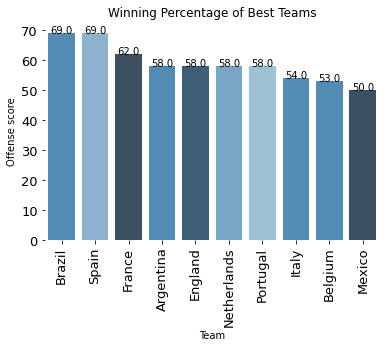

In [ ]:
# Winning Percentage of Best Teams
plt.title("Winning Percentage of Best Teams");
ax.set_xlabel('Team Name')
ax.set_ylabel('Average Win/Team')
groupedvalues = Fifa_rank_win_10.groupby('team').sum().reset_index()
ranks = groupedvalues.Average_win_Per.rank().sub(1).astype(int).array
palette = sns.color_palette("Blues_d", len(ranks))
ax = sns.barplot(x='team', y='Average_win_Per',  palette=np.array(palette)[ranks], data=Fifa_rank_win_10)
ax.set_xlabel('Team')
ax.set_ylabel('Offense score')
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
for index, row in Fifa_rank_win_10.iterrows():
    ax.text(row.name, row.Average_win_Per, round(row.Average_win_Per, 2), color='black', ha='center')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)  
plt.axis('on')
plt.grid(False) #to remove the gride lines
plt.show()


In [ ]:
#BEST Attacking team
FIFA_offense = FIFA[['date', 'home_team', 'away_team','home_team_mean_offense_score','away_team_mean_offense_score']]
home = FIFA_offense[['date','home_team','home_team_mean_offense_score']].rename(columns={"home_team":"team","home_team_mean_offense_score":"offense_score"})
away = FIFA_offense[['date','away_team','away_team_mean_offense_score']].rename(columns={"away_team":"team","away_team_mean_offense_score":"offense_score"})
FIFA_offense = pd.concat([home,away])
FIFA_offense = FIFA_offense.sort_values(['date','team'],ascending=[False,True])
FIFA_offense_10 = FIFA_offense.groupby('team').first().sort_values('offense_score',ascending=False)[0:10].reset_index()
FIFA_offense_10

,team,date,offense_score
0,Argentina,2022-06-05,89.0
1,France,2022-06-13,88.3
2,England,2022-06-14,88.0
3,Brazil,2022-06-06,86.3
4,Portugal,2022-06-12,86.0
5,Belgium,2022-06-14,85.7
6,Italy,2022-06-14,85.3
7,Spain,2022-06-12,85.0
8,Poland,2022-06-14,84.7
9,Uruguay,2022-06-11,84.3


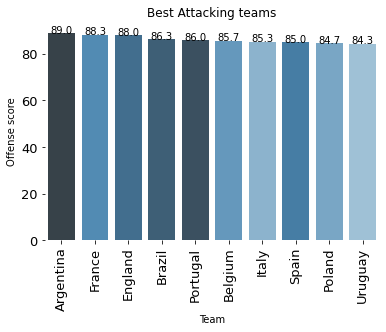

In [ ]:
# BEST Attacking Teams
plt.title("Best Attacking teams");
groupedvalues = FIFA_offense_10.groupby('team').sum().reset_index()
ranks = groupedvalues.offense_score.rank().sub(1).astype(int).array
palette = sns.color_palette("Blues_d", len(ranks))
ax = sns.barplot(x='team', y='offense_score',  palette=np.array(palette)[ranks], data=FIFA_offense_10)
ax.set_xlabel('Team')
ax.set_ylabel('Offense score')
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
for index, row in FIFA_offense_10.iterrows():
    ax.text(row.name, row.offense_score, round(row.offense_score, 2), color='black', ha='center')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)  
plt.show()

In [ ]:
#BEST Midfield team
FIFA_midfield = FIFA[['date', 'home_team', 'away_team','home_team_mean_midfield_score','away_team_mean_midfield_score']]
home = FIFA_midfield[['date','home_team','home_team_mean_midfield_score']].rename(columns={"home_team":"team","home_team_mean_midfield_score":"midfield_score"})
away = FIFA_midfield[['date','away_team','away_team_mean_midfield_score']].rename(columns={"away_team":"team","away_team_mean_midfield_score":"midfield_score"})
FIFA_midfield = pd.concat([home,away])
FIFA_midfield = FIFA_midfield.sort_values(['date','team'],ascending=[False,True])
FIFA_midfield_10 = FIFA_midfield.groupby('team').first().sort_values('midfield_score',ascending=False)[0:10].reset_index()
FIFA_midfield_10

,team,date,midfield_score
0,Germany,2022-06-14,87.8
1,France,2022-06-13,86.8
2,Spain,2022-06-12,86.0
3,Belgium,2022-06-14,85.5
4,Brazil,2022-06-06,85.5
5,Portugal,2022-06-12,84.5
6,Italy,2022-06-14,84.5
7,Croatia,2022-06-13,84.2
8,England,2022-06-14,84.0
9,Argentina,2022-06-05,84.0


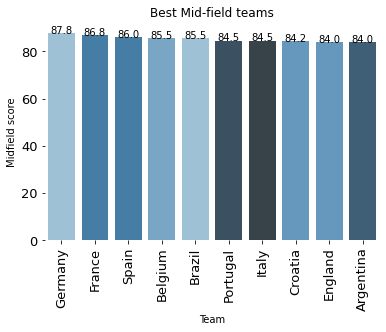

In [ ]:
#Best Mid-field Teams
plt.title("Best Mid-field teams");
groupedvalues = FIFA_midfield_10.groupby('team').sum().reset_index()
ranks = groupedvalues.midfield_score.rank().sub(1).astype(int).array
ax = sns.barplot(x='team', y='midfield_score',  palette=np.array(palette)[ranks], data=FIFA_midfield_10)
ax.set_xlabel('Team')
ax.set_ylabel('Midfield score')
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
for index, row in FIFA_midfield_10.iterrows():
    ax.text(row.name, row.midfield_score, round(row.midfield_score, 2), color='black', ha='center')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)  
plt.show()

In [ ]:
#BEST Defense team
FIFA_defense = FIFA[['date', 'home_team', 'away_team','home_team_mean_defense_score','away_team_mean_defense_score']]
home = FIFA_defense[['date','home_team','home_team_mean_defense_score']].rename(columns={"home_team":"team","home_team_mean_defense_score":"defense_score"})
away = FIFA_defense[['date','away_team','away_team_mean_defense_score']].rename(columns={"away_team":"team","away_team_mean_defense_score":"defense_score"})
FIFA_defense = pd.concat([home,away])
FIFA_defense = FIFA_defense.sort_values(['date','team'],ascending=[False,True])
FIFA_defense_10 = FIFA_defense.groupby('team').first().sort_values('defense_score',ascending=False)[0:10].reset_index()
FIFA_defense_10

,team,date,defense_score
0,Spain,2022-06-12,86.5
1,Portugal,2022-06-12,85.2
2,Netherlands,2022-06-14,85.2
3,England,2022-06-14,85.0
4,Brazil,2022-06-06,84.8
5,Italy,2022-06-14,84.2
6,France,2022-06-13,84.2
7,Germany,2022-06-14,84.0
8,Argentina,2022-06-05,82.2
9,Uruguay,2022-06-11,81.2


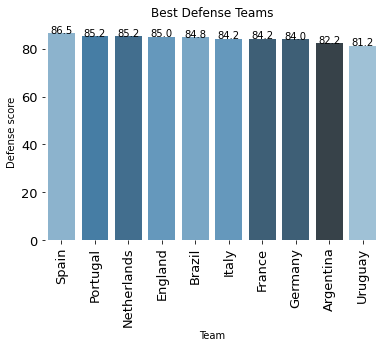

In [ ]:
#BEST Defense Teams
plt.title("Best Defense Teams")
groupedvalues = FIFA_defense_10.groupby('team').sum().reset_index()
ranks = groupedvalues.defense_score.rank().sub(1).astype(int).array
ax = sns.barplot(x='team', y='defense_score',  palette=np.array(palette)[ranks], data=FIFA_defense_10)
ax.set_xlabel('Team')
ax.set_ylabel('Defense score')
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
for index, row in FIFA_defense_10.iterrows():
    ax.text(row.name, row.defense_score, round(row.defense_score, 2), color='black', ha='center')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)  
plt.show()

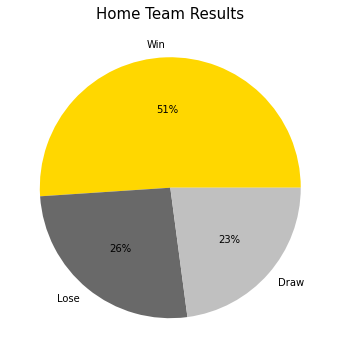

In [ ]:
# Does Home teams have any advantage?
# Select all matches played at non-neutral locations
home_team_advantage = FIFA[FIFA['neutral_location'] == False]['home_team_result'].value_counts(normalize = True)
fig, axes = plt.subplots(1, 1, figsize=(6,6))
colors_list = ['gold', 'dimgray', 'silver']
ax =plt.pie(home_team_advantage  ,labels = ['Win', 'Lose', 'Draw'], autopct='%.0f%%' , colors= colors_list, )
plt.title('Home Team Results', fontsize = 15)
plt.show()

In [ ]:
#Home team Goalkeeper score summary statistics
FIFA[FIFA['home_team'] == "Ecuador"]['home_team_goalkeeper_score'].describe()

count    79.000000
mean     71.088608
std       3.258873
min      65.000000
25%      69.500000
50%      72.000000
75%      74.000000
max      75.000000
Name: home_team_goalkeeper_score, dtype: float64

In [ ]:
#Away team Goal keeper score Summary statistics
FIFA[FIFA['away_team'] == "Uruguay"]['away_team_goalkeeper_score'].describe()

count    126.000000
mean      79.325397
std        2.952502
min       74.000000
25%       76.000000
50%       81.000000
75%       82.000000
max       83.000000
Name: away_team_goalkeeper_score, dtype: float64

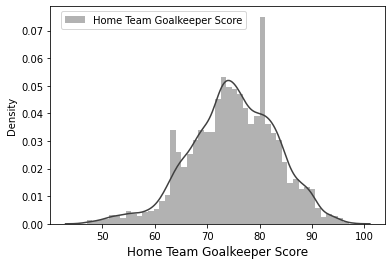

In [ ]:
# Home team Goalkeeper score
sns.distplot(FIFA[['home_team_goalkeeper_score']], hist=True , color="#404040" ,label='Home Team Goalkeeper Score')
plt.legend(bbox_to_anchor=(0.6,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Home Team Goalkeeper Score',fontsize = 12)
plt.show()

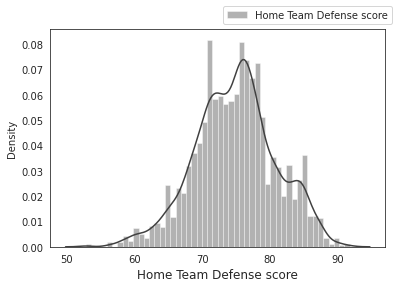

In [ ]:
# Home team Defense score
sns.distplot(FIFA[["home_team_mean_defense_score"]], hist=True , color="#404040" ,label='Home Team Defense score')
plt.legend(bbox_to_anchor=(0.5,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Home Team Defense score',fontsize = 12)
plt.show()

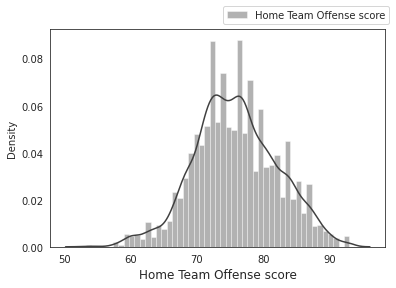

In [ ]:
# Home team Offense score
sns.distplot(FIFA[["home_team_mean_offense_score"]], hist=True , color="#404040" ,label='Home Team Offense score')
plt.legend(bbox_to_anchor=(0.5,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Home Team Offense score',fontsize = 12)
plt.show()

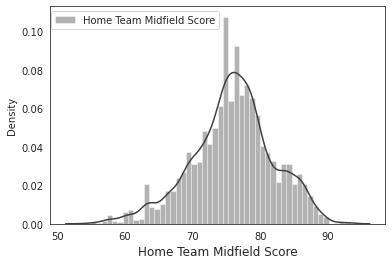

In [ ]:
# Home team Midfield score
sns.distplot(FIFA[['home_team_mean_midfield_score']], hist=True , color="#404040" ,label='Home Team Midfield Score')
plt.legend(bbox_to_anchor=(0.52,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Home Team Midfield Score',fontsize = 12)
plt.show()

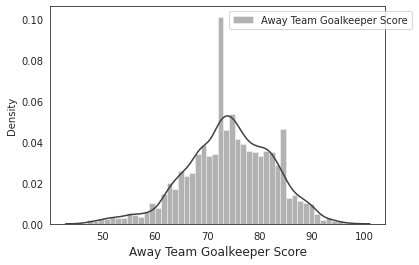

In [ ]:
# Away team Goalkeeper score
sns.distplot(FIFA[['away_team_goalkeeper_score']], hist=True , color="#404040" ,label='Away Team Goalkeeper Score')
plt.legend(bbox_to_anchor=(0.52,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Away Team Goalkeeper Score',fontsize = 12)
plt.show()

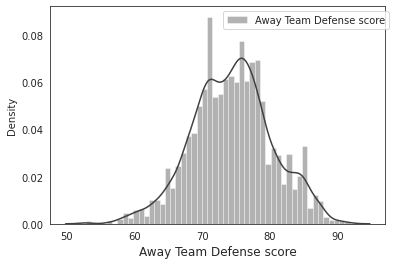

In [ ]:
# Away team Defense score
sns.distplot(FIFA[["away_team_mean_defense_score"]], hist=True , color="#404040" ,label='Away Team Defense score')
plt.legend(bbox_to_anchor=(0.5,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Away Team Defense score',fontsize = 12)
plt.show()

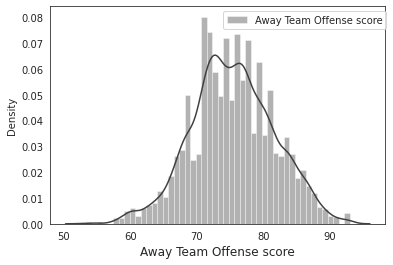

In [ ]:
# Away team Offense score
sns.distplot(FIFA[["away_team_mean_offense_score"]], hist=True , color="#404040" ,label='Away Team Offense score')
plt.legend(bbox_to_anchor=(0.5,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Away Team Offense score',fontsize = 12)
plt.show()

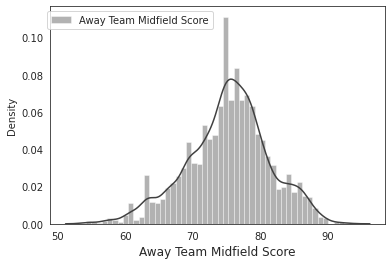

In [ ]:
# Away team Midfield score
sns.distplot(FIFA[['away_team_mean_midfield_score']], hist=True , color="#404040" ,label='Away Team Midfield Score')
plt.legend(bbox_to_anchor=(0.5,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Away Team Midfield Score',fontsize = 12)
plt.show()

In [ ]:
#Filled mean for na's in goal_keeper_score
FIFA['home_team_goalkeeper_score'] = round(FIFA.groupby("home_team")["home_team_goalkeeper_score"]
                                           .transform(lambda x: x.fillna(x.mean())))
FIFA['away_team_goalkeeper_score'] = round(FIFA.groupby("away_team")["away_team_goalkeeper_score"]
                                           .transform(lambda x: x.fillna(x.mean())))

In [ ]:
#Away team Defense score summary statistics
FIFA[FIFA['away_team'] == "Uruguay"]['away_team_mean_defense_score'].describe()

count    126.000000
mean      79.550794
std        2.379907
min       75.500000
25%       78.500000
50%       79.000000
75%       81.200000
max       84.200000
Name: away_team_mean_defense_score, dtype: float64

In [ ]:
# Home Team Defense Score summary statistics
FIFA[FIFA['home_team'] == "Brazil"]['home_team_mean_defense_score'].describe()

count    135.000000
mean      85.785185
std        1.524209
min       83.800000
25%       84.800000
50%       85.200000
75%       87.000000
max       89.000000
Name: home_team_mean_defense_score, dtype: float64

In [ ]:
#Filled mean for na's in defense score
FIFA['home_team_mean_defense_score'] = round(FIFA.groupby('home_team')['home_team_mean_defense_score']
                                             .transform(lambda x : x.fillna(x.mean())))
FIFA['away_team_mean_defense_score'] = round(FIFA.groupby('away_team')['away_team_mean_defense_score']
                                             .transform(lambda x : x.fillna(x.mean())))

In [ ]:
#Summary statistics for Away team Offense score
FIFA[FIFA['away_team'] == "Uruguay"]['away_team_mean_offense_score'].describe()

count    126.000000
mean      83.494444
std        1.794851
min       80.000000
25%       82.300000
50%       83.700000
75%       84.700000
max       86.700000
Name: away_team_mean_offense_score, dtype: float64

In [ ]:
#Summary statistics for Home team Offense score
FIFA[FIFA['home_team'] == "Uruguay"]['home_team_mean_offense_score'].describe()

count    85.000000
mean     83.700000
std       1.569122
min      80.000000
25%      83.000000
50%      84.000000
75%      84.700000
max      86.700000
Name: home_team_mean_offense_score, dtype: float64

In [ ]:
FIFA['home_team_mean_offense_score'] = round(FIFA.groupby('home_team')['home_team_mean_offense_score']
                                             .transform(lambda x : x.fillna(x.mean())))
FIFA['away_team_mean_offense_score'] = round(FIFA.groupby('away_team')['away_team_mean_offense_score']
                                             .transform(lambda x : x.fillna(x.mean())))

In [ ]:
#Summary statistics for Away team Midfield score
FIFA[FIFA['away_team'] == "Uruguay"]['away_team_mean_midfield_score'].describe()

count    126.000000
mean      78.594444
std        1.802012
min       74.800000
25%       77.500000
50%       78.500000
75%       80.000000
max       81.200000
Name: away_team_mean_midfield_score, dtype: float64

In [ ]:
#Summary statistics for HOME TEAM Midfield Score
FIFA[FIFA['home_team'] == "Uruguay"]['home_team_mean_midfield_score'].describe()

count    85.000000
mean     78.396471
std       1.699821
min      74.800000
25%      77.500000
50%      78.200000
75%      80.000000
max      81.200000
Name: home_team_mean_midfield_score, dtype: float64

In [ ]:
FIFA['home_team_mean_midfield_score'] = round(FIFA.groupby('home_team')['home_team_mean_midfield_score']
                                              .transform(lambda x : x.fillna(x.mean())))
FIFA['away_team_mean_midfield_score'] = round(FIFA.groupby('away_team')['away_team_mean_midfield_score']
                                              .transform(lambda x : x.fillna(x.mean())))


In [ ]:
# Checking for NULL values
FIFA.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5683
away_team_goalkeeper_score       6254
home_team_mean_defense_score     8019
home_team_mean_offense_score     6995
home_team_mean_midfield_score    6955
away_team_mean_defense_score     8285
away_team_mean_offense_score     7165
away_team_mean_midfield_score    7036
dtype: int64

In [ ]:
#For not performing well teams,na was filled with an average score of 50.
FIFA.fillna(50,inplace=True)

In [ ]:
#Task 2 - Filter the teams participating in World cup 22
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 
             'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 
             'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland',
             'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
Finals_FIFA = FIFA[(FIFA["home_team"].apply(lambda x: x in list_2022)) | (FIFA["away_team"]
                                                                          .apply(lambda x: x in list_2022))]

In [ ]:
Finals_FIFA.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
#Top  teams in Worldcup 22 with individual winning percentage
rank = Finals_FIFA[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team",
                                                                        "home_team_fifa_rank":"rank"})
away = rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team",
                                                                        "away_team_fifa_rank":"rank"})
rank = pd.concat([home,away])

In [ ]:
#Select countries and their latest matches
rank = rank.sort_values(['team','date'],ascending=[True,False])
rank_top10 = rank.groupby('team').first().sort_values('rank',ascending=True).reset_index()
rank_top10 = rank_top10[(rank_top10["team"].apply(lambda x: x in list_2022))][0:10]
rank_top10


,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10
10,Denmark,2022-06-13,11


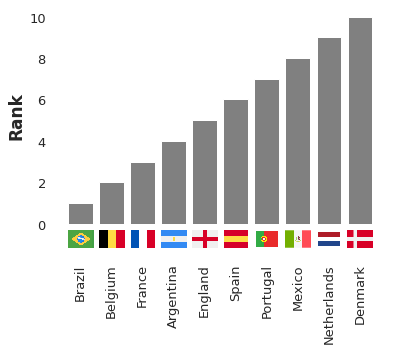

In [ ]:
#Best Teams and their Ranks in FIFA22
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
def get_flag(name):
    path = "/content/drive/MyDrive/LD7187MachineLearning/Flags/{}.png".format(name.title())
    im = plt.imread(path)
    return im
def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False, xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)
countries = ["Brazil", "Belgium", "France", "Argentina", "England","Spain","Portugal","Mexico","Netherlands","Denmark"]
valuesA = [1, 2, 3,4,5,6,7,8,9,10]
fig, ax = plt.subplots()
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('Rank',fontsize = 17, weight = 'bold')
ax.bar(range(len(countries)), valuesA, width=0.8,align="center" , color = 'grey')
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.tick_params(axis='x', which='major', pad=36)
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)
for i, c in enumerate(countries):
    offset_image(i, c, ax)


In [ ]:
#Winning Percentage of Best Teams participating in FIFA
rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(rank_top10['team'])
rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(rank_top10['team'])
rank_top10['Average_win_Percentage'] = round((rank_top10['Home_win_Per'] + rank_top10['Away_win_Per'])/2)
rank_top10_Win_FIFA = rank_top10.sort_values('Average_win_Percentage',ascending=False)
rank_top10_Win_FIFA
Fifa_2022_win = rank_top10_Win_FIFA.groupby('team').first().sort_values('Average_win_Percentage',ascending=False)[0:10].reset_index()
Fifa_2022_win

,team,date,rank,Home_win_Per,Away_win_Per,Average_win_Percentage
0,Brazil,2022-06-06,1,78,60,69.0
1,Spain,2022-06-12,7,77,61,69.0
2,France,2022-06-13,3,66,57,62.0
3,Argentina,2022-06-05,4,68,49,58.0
4,England,2022-06-14,5,64,51,58.0
5,Netherlands,2022-06-14,10,62,55,58.0
6,Portugal,2022-06-12,8,67,49,58.0
7,Belgium,2022-06-14,2,60,46,53.0
8,Denmark,2022-06-13,11,56,45,50.0
9,Mexico,2022-06-14,9,60,41,50.0


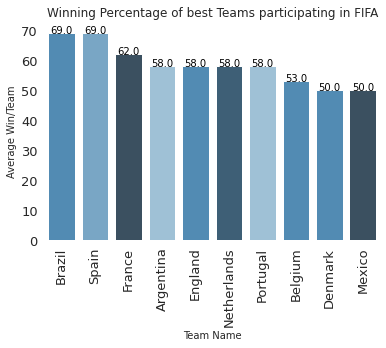

In [ ]:
# Winning Percentage of Best Teams participating in FIFA
plt.title("Winning Percentage of best Teams participating in FIFA");
groupedvalues = Fifa_2022_win.groupby('team').sum().reset_index()
ranks_FIFA = groupedvalues.Average_win_Percentage.rank().sub(1).astype(int).array
palette = sns.color_palette("Blues_d", len(ranks_FIFA))
ax = sns.barplot(x='team', y='Average_win_Percentage',  palette=np.array(palette)[ranks_FIFA], data=Fifa_2022_win)
ax.set_xlabel('Team Name')
ax.set_ylabel('Average Win/Team')
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
for index, row in Fifa_2022_win.iterrows():
    ax.text(row.name, row.Average_win_Percentage, round(row.Average_win_Percentage, 2), color='black', ha='center')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)  
plt.axis('on')
plt.grid(False) #to remove the gride lines
plt.show()

In [ ]:
#Mapping numeric values for home_team_result to find the correleations
Finals_FIFA['home_team_result'] = Finals_FIFA['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

In [ ]:
Finals_FIFA.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home_team_mean_offense_score     0.165981
home_team_mean_defense_score     0.158841
home_team_mean_midfield_score    0.157639
home_team_score                  0.127916
home_team_goalkeeper_score       0.122509
away_team_fifa_rank              0.111366
home_team_total_fifa_points      0.015498
away_team_total_fifa_points     -0.047726
neutral_location                -0.066361
away_team_mean_offense_score    -0.117055
away_team_mean_defense_score    -0.122354
away_team_goalkeeper_score      -0.124837
away_team_mean_midfield_score   -0.127505
home_team_fifa_rank             -0.186355
away_team_score                 -0.464635
Name: home_team_result, dtype: float64

In [ ]:
#Dropping unnecessary colums
Finals_FIFA = Finals_FIFA.drop(['date', 'home_team_continent','away_team_continent','home_team_total_fifa_points', 
'away_team_total_fifa_points','home_team_score', 'away_team_score', 'tournament', 'city', 'country',
'neutral_location','shoot_out'],axis=1)
Finals_FIFA.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
#change column names
Finals_FIFA.rename(columns={"home_team":"Team1", "away_team": "Team2", "home_team_fifa_rank": "Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"},inplace=True)


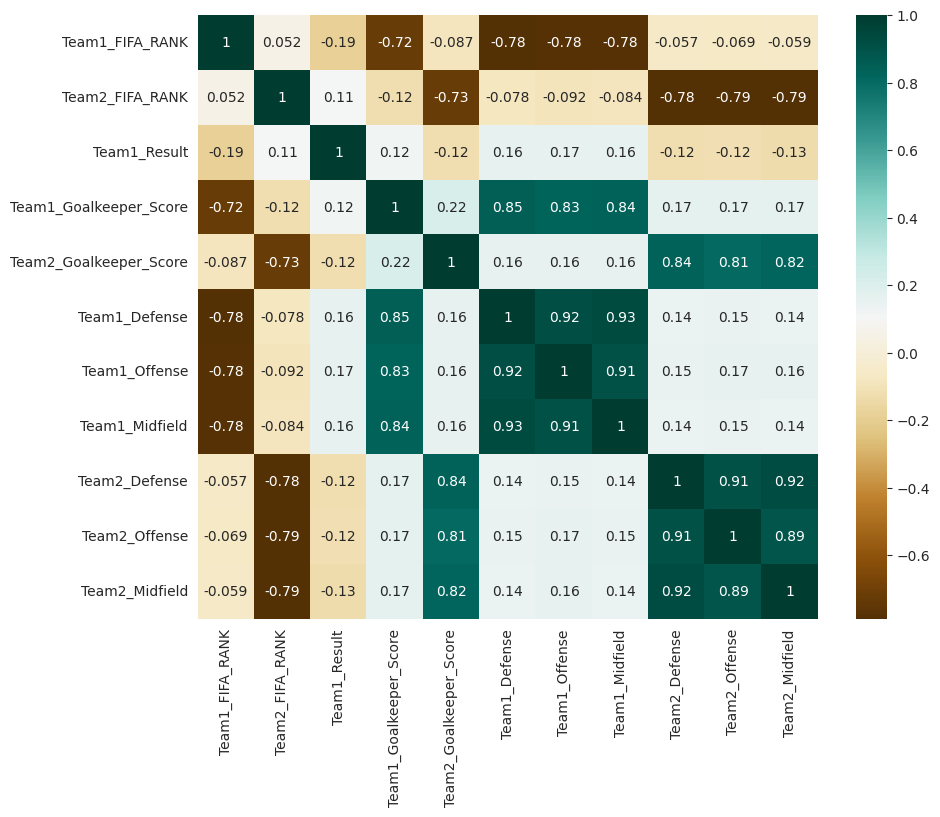

In [ ]:
#Plotting Heatmap
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(Finals_FIFA.corr(),annot=True, cmap='BrBG')



In [ ]:
Finals_FIFA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9321 entries, 0 to 23920
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team1                   9321 non-null   object 
 1   Team2                   9321 non-null   object 
 2   Team1_FIFA_RANK         9321 non-null   int64  
 3   Team2_FIFA_RANK         9321 non-null   int64  
 4   Team1_Result            9321 non-null   int64  
 5   Team1_Goalkeeper_Score  9321 non-null   float64
 6   Team2_Goalkeeper_Score  9321 non-null   float64
 7   Team1_Defense           9321 non-null   float64
 8   Team1_Offense           9321 non-null   float64
 9   Team1_Midfield          9321 non-null   float64
 10  Team2_Defense           9321 non-null   float64
 11  Team2_Offense           9321 non-null   float64
 12  Team2_Midfield          9321 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1019.5+ KB


In [ ]:
Finals_FIFA.to_csv("Data.csv")


In [ ]:
#Interchanged Team1 and Team 2 details to get accuracy results
Finals_FIFA = pd.read_csv("Data.csv")
Finals_FIFA.tail()

,Unnamed: 0,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
9316,23908,Netherlands,Wales,10,18,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
9317,23909,Poland,Belgium,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
9318,23918,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
9319,23919,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0
9320,23920,Korea Republic,Egypt,29,32,1,75.0,70.0,73.0,80.0,74.0,70.0,79.0,71.0


In [ ]:
Finals_FIFA = Finals_FIFA.drop('Unnamed: 0', axis = 1)

In [ ]:
Finals_FIFA

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bolivia,Uruguay,59,22,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0
1,Brazil,Mexico,8,14,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
2,Ecuador,Venezuela,35,94,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0
3,Paraguay,Argentina,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0
4,Sweden,Switzerland,4,3,0,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,Netherlands,Wales,10,18,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
9317,Poland,Belgium,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
9318,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
9319,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0


In [ ]:
#DataFrame for pipeline
Pipeline_FIFA = Finals_FIFA



In [ ]:
#Created dummies for categorical columns to get best accuracy
Finals_FIFA = pd.get_dummies(Finals_FIFA)


In [ ]:
#splitted X and y and train test split (For League Model)
X = Finals_FIFA.drop('Team1_Result',axis=1)
y = Finals_FIFA['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
#Validtion and test set
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [ ]:
# Standard Scalar Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

              precision    recall  f1-score   support

           0       0.38      0.44      0.41       116
           1       0.64      0.61      0.62       241
           2       0.25      0.24      0.24       110

    accuracy                           0.48       467
   macro avg       0.42      0.43      0.42       467
weighted avg       0.48      0.48      0.48       467



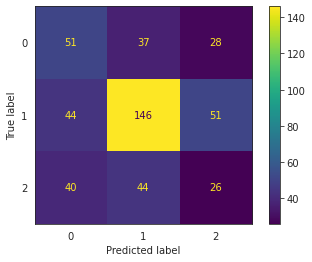

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
metrics_display(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.47      0.59      0.52       116
           1       0.64      0.73      0.68       241
           2       0.29      0.13      0.18       110

    accuracy                           0.55       467
   macro avg       0.47      0.48      0.46       467
weighted avg       0.52      0.55      0.52       467



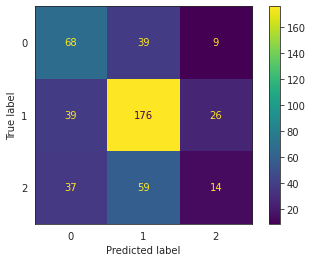

In [ ]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.45      0.50      0.47       116
           1       0.62      0.86      0.72       241
           2       0.33      0.01      0.02       110

    accuracy                           0.57       467
   macro avg       0.47      0.46      0.40       467
weighted avg       0.51      0.57      0.49       467



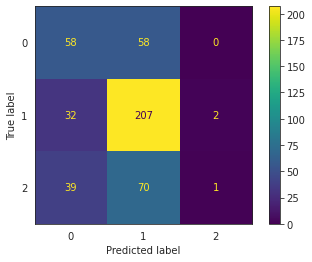

In [ ]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.46      0.57      0.51       116
           1       0.64      0.84      0.73       241
           2       0.50      0.03      0.05       110

    accuracy                           0.58       467
   macro avg       0.53      0.48      0.43       467
weighted avg       0.56      0.58      0.51       467



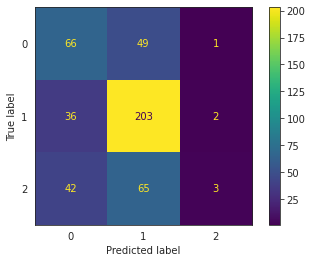

In [ ]:
#XGB Boost
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

              precision    recall  f1-score   support

           0       0.54      0.61      0.58       121
           1       0.65      0.87      0.74       240
           2       0.17      0.01      0.02       105

    accuracy                           0.61       466
   macro avg       0.45      0.50      0.45       466
weighted avg       0.51      0.61      0.54       466



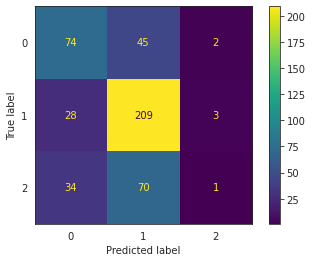

In [ ]:
#Checking the final score on testing the holdout test in XGB
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [300, 350],
    "max_depth" : [3,4],
    "gamma" : [0.01],
    "learning_rate" : [0.01]
}
# make a GridSearchCV object
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)
from sklearn.model_selection import GridSearchCV

In [ ]:
GS.fit(X_train,y_train)
#To get only the best hyperparameter values

print(GS.best_params_) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.613 total time=  42.6s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.598 total time=  43.8s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.598 total time=  42.4s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.589 total time=  44.1s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.586 total time=  41.8s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=350;, score=0.613 total time=  50.2s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=350;, score=0.597 total time=  49.1s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=350;, score=0.597 total time=  49.7s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=350;,

              precision    recall  f1-score   support

           0       0.46      0.57      0.51       116
           1       0.64      0.84      0.73       241
           2       0.50      0.03      0.05       110

    accuracy                           0.58       467
   macro avg       0.53      0.48      0.43       467
weighted avg       0.56      0.58      0.51       467



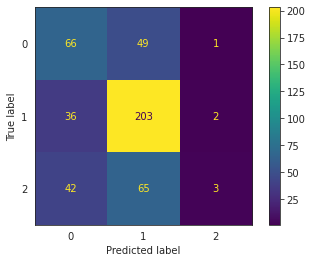

In [ ]:
# XGBoost Classifier with hyperparameters on test dataset
model = XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01, n_estimators = 300, 
                      max_depth = 4)
metrics_display(XGBClassifier(use_label_encoder=False))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       121
           1       0.64      0.88      0.75       240
           2       0.25      0.01      0.02       105

    accuracy                           0.62       466
   macro avg       0.49      0.51      0.45       466
weighted avg       0.54      0.62      0.54       466



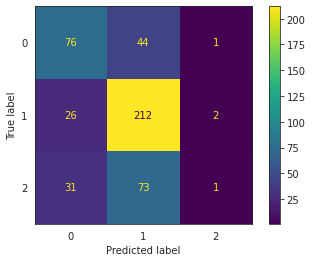

In [ ]:
# XGBoost Classifier with hyperparameters on validation holdout dataset
model = XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01, n_estimators = 300,
                      max_depth = 4)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [ ]:
#Creating pipeline for League matches
# Created Pipeline for XGBoost Classifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')



In [ ]:
FIFA_X = Pipeline_FIFA.drop('Team1_Result',axis=1)
FIFA_y = Pipeline_FIFA['Team1_Result']

In [ ]:
FIFA_X

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bolivia,Uruguay,59,22,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0
1,Brazil,Mexico,8,14,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
2,Ecuador,Venezuela,35,94,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0
3,Paraguay,Argentina,67,5,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0
4,Sweden,Switzerland,4,3,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9316,Netherlands,Wales,10,18,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
9317,Poland,Belgium,26,2,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
9318,Chile,Ghana,28,60,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
9319,Japan,Tunisia,23,35,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0


In [ ]:
FIFA_y

0       1
1       2
2       1
3       0
4       0
       ..
9316    1
9317    0
9318    0
9319    0
9320    1
Name: Team1_Result, Length: 9321, dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False ,
gamma= 0.01, learning_rate= 0.01, n_estimators= 300, max_depth= 4))
pipe_League.fit(FIFA_X,FIFA_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(gamma=0.01, learning_rate=0.01, max_depth=4,
                               n_estimators=300, objective='multi:softprob',
                               use_label_encoder=False))])

In [ ]:
#Saving the League model
import joblib
joblib.dump(pipe_League,"League_model.pkl")

['League_model.pkl']

In [ ]:
#Predictions for Knockout Stage - Removing Draw status
knock_FIFA = Pipeline_FIFA[Pipeline_FIFA['Team1_Result'] != 2]
pipe_knock_df = knock_FIFA
knock_FIFA = pd.get_dummies(knock_FIFA)
X = knock_FIFA.drop('Team1_Result',axis=1)
y = knock_FIFA['Team1_Result']


In [ ]:
# train , test, validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       243
           1       0.82      0.83      0.83       479

    accuracy                           0.77       722
   macro avg       0.74      0.74      0.74       722
weighted avg       0.77      0.77      0.77       722



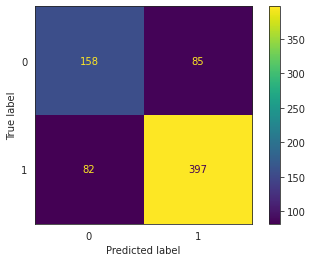

In [ ]:
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       243
           1       0.81      0.86      0.84       479

    accuracy                           0.78       722
   macro avg       0.75      0.74      0.74       722
weighted avg       0.77      0.78      0.77       722



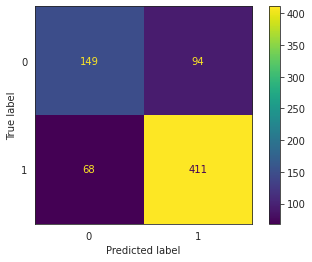

In [ ]:
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       243
           1       0.83      0.85      0.84       479

    accuracy                           0.78       722
   macro avg       0.76      0.75      0.75       722
weighted avg       0.78      0.78      0.78       722



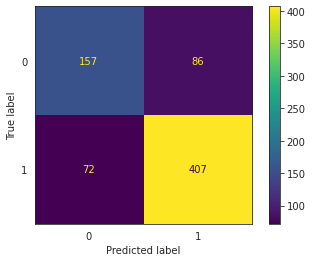

In [ ]:
metrics_display(XGBClassifier(use_label_encoder=False))

In [ ]:
search_space = {
    "max_depth" : [15,16],
    "max_leaf_nodes" : [190,200],
    "min_samples_leaf" : [5],
    "n_estimators" : [320]
}
GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

In [ ]:
#GS.fit(X_train,y_train)
#print(GS.best_params_)

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       288
           1       0.79      0.85      0.82       433

    accuracy                           0.77       721
   macro avg       0.77      0.75      0.76       721
weighted avg       0.77      0.77      0.77       721



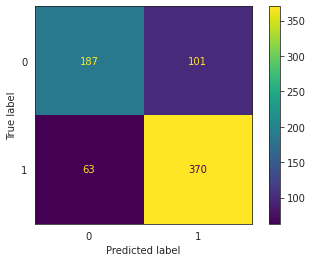

In [ ]:
#XGBoost is giving good accuracy, so testing with holdout test and finalising the model
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);


              precision    recall  f1-score   support

           0       0.69      0.67      0.68       288
           1       0.78      0.80      0.79       433

    accuracy                           0.75       721
   macro avg       0.74      0.73      0.74       721
weighted avg       0.75      0.75      0.75       721



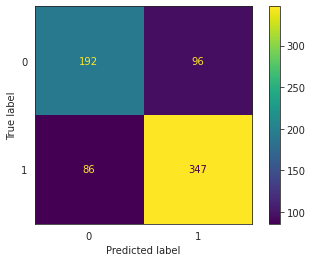

In [ ]:
#Random Forest is giving good accuracy, so testing with holdout test and finalising the model
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);


              precision    recall  f1-score   support

           0       0.75      0.62      0.68       288
           1       0.78      0.86      0.81       433

    accuracy                           0.77       721
   macro avg       0.76      0.74      0.75       721
weighted avg       0.76      0.77      0.76       721



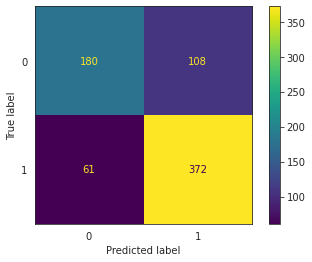

In [ ]:
# Random Forest Classifier with Hyperparameters
model = RandomForestClassifier(max_depth= 16, n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       243
           1       0.82      0.83      0.83       479

    accuracy                           0.77       722
   macro avg       0.74      0.74      0.74       722
weighted avg       0.77      0.77      0.77       722



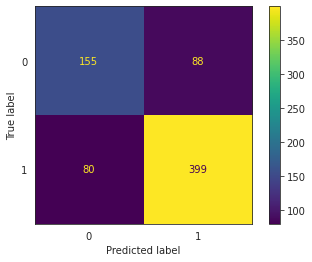

In [ ]:
# Random Forest Classifier with Hyperparameters
model = RandomForestClassifier(max_depth= 16, n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5)
metrics_display(RandomForestClassifier())

In [ ]:
#XGB Boost - Tuning & Hold-out Validation
search_space = {
    "n_estimators" : [500],
    "max_depth" : [5],
    "gamma" : [0.01,0.1],
    "learning_rate" : [0.001,0.01]
}
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)
GS.fit(X_train,y_train)
print(GS.best_params_) 
# to get only the best hyperparameter values that we searched for

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.781 total time=  24.7s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.765 total time=  24.7s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.782 total time=  24.6s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.748 total time=  24.7s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.778 total time=  24.7s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.788 total time=  25.0s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.769 total time=  24.9s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.778 total time=  26.3s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       243
           1       0.83      0.85      0.84       479

    accuracy                           0.78       722
   macro avg       0.76      0.75      0.75       722
weighted avg       0.78      0.78      0.78       722



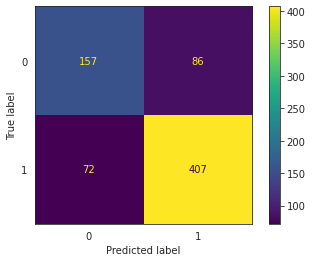

In [ ]:
# XGBoost Classifier with validation holdout  dataset with hyperparameters
model = XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500)
metrics_display(XGBClassifier(use_label_encoder=False))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       288
           1       0.79      0.85      0.82       433

    accuracy                           0.77       721
   macro avg       0.77      0.75      0.76       721
weighted avg       0.77      0.77      0.77       721



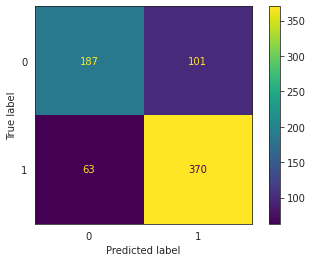

In [ ]:
# XGBoost Classifier with validation dataset
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       288
           1       0.78      0.85      0.81       433

    accuracy                           0.77       721
   macro avg       0.76      0.75      0.75       721
weighted avg       0.76      0.77      0.76       721



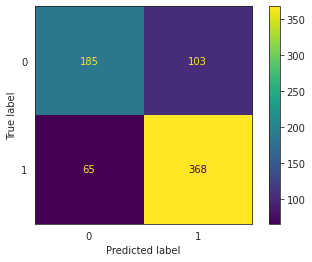

In [ ]:
# XGBoost Classifier with validation dataset with hyperparameters
model = XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [ ]:
#Creating a pipeline for Knock out Model using  RandomForest Classifier
FIFA_KNOCK_X = pipe_knock_df.drop('Team1_Result',axis=1)
FIFA_KNOCK_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),RandomForestClassifier())
pipe_knock.fit(FIFA_KNOCK_X,FIFA_KNOCK_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])

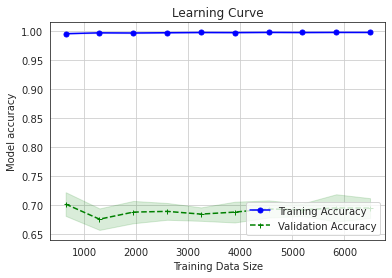

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=DecisionTreeClassifier(), X=X, y=y,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()



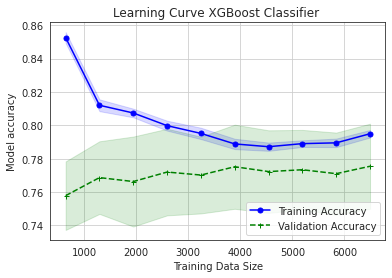

In [ ]:
# Learning Curve League Model XGBoost Classifier
train_sizes, train_scores, test_scores = learning_curve(estimator=XGBClassifier(), X=X, y=y,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10,50),
                                                     n_jobs=1)
## Calculated training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve XGBoost Classifier ')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()



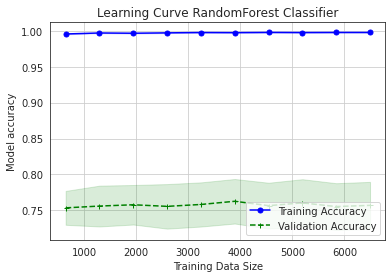

In [ ]:
#Learning curve Knock out Model
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=RandomForestClassifier(), X=X, y=y,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10 ,50),
                                                     n_jobs=1)
# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve RandomForest Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()



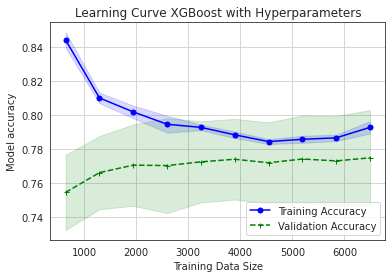

In [ ]:
# Learning Curve for XGBoost Classifier League Model with Hyper parameters
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4), X=X, y=y,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve XGBoost with Hyperparameters')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()



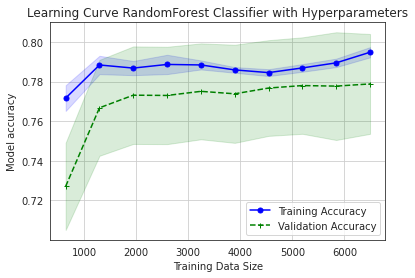

In [ ]:
# Knock model learning curve with Hyper paramters
train_sizes, train_scores, test_scores = learning_curve(estimator=RandomForestClassifier(max_depth= 16, 
                                            n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5

), X=X, y=y,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10 ,50),
                                                     n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve RandomForest Classifier with Hyperparameters')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

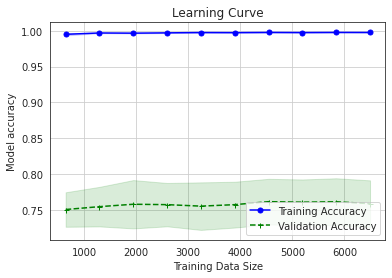

In [ ]:
# Knockout model learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=RandomForestClassifier(), X=X, y=y,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()



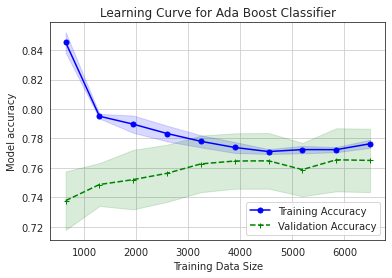

In [ ]:
# Learning Curve For League Model AdaBoost Classifier
train_sizes, train_scores, test_scores = learning_curve(estimator=AdaBoostClassifier(), X=X, y=y,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve for Ada Boost Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
 #Learning curve
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

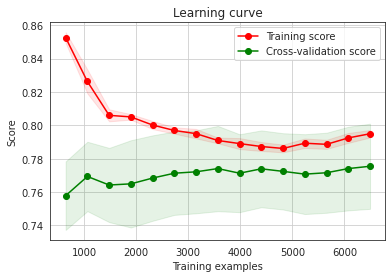

In [ ]:
#learn curve
logreg  = XGBClassifier()
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1
cv = 10
if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X, y, logreg, cv, train_size)

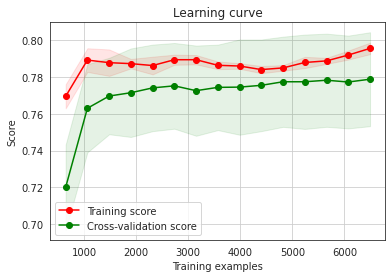

In [ ]:
#learn curve: KNN
knn = RandomForestClassifier(max_depth= 16, n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X, y, knn, cv, train_size)

In [ ]:
from sklearn.model_selection import GridSearchCV
search_space = {
    "max_depth" : [11,12,13,14,15,16],
    "max_leaf_nodes" : [170,180,190,200,210,220,230],
    "min_samples_leaf" : [3,4,5,6,7,8],
    "n_estimators" : [310,320,330,340,350]
}


     

GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

In [ ]:
GS.fit(X_train,y_train)


     

print(GS.best_params_)


Fitting 5 folds for each of 1260 candidates, totalling 6300 fits
[CV 1/5] END max_depth=11, max_leaf_nodes=170, min_samples_leaf=3, n_estimators=310;, score=0.785 total time=   1.4s
[CV 2/5] END max_depth=11, max_leaf_nodes=170, min_samples_leaf=3, n_estimators=310;, score=0.767 total time=   1.4s
[CV 3/5] END max_depth=11, max_leaf_nodes=170, min_samples_leaf=3, n_estimators=310;, score=0.778 total time=   1.4s
[CV 4/5] END max_depth=11, max_leaf_nodes=170, min_samples_leaf=3, n_estimators=310;, score=0.751 total time=   1.4s
[CV 5/5] END max_depth=11, max_leaf_nodes=170, min_samples_leaf=3, n_estimators=310;, score=0.790 total time=   1.4s
[CV 1/5] END max_depth=11, max_leaf_nodes=170, min_samples_leaf=3, n_estimators=320;, score=0.784 total time=   1.5s
[CV 2/5] END max_depth=11, max_leaf_nodes=170, min_samples_leaf=3, n_estimators=320;, score=0.769 total time=   1.5s
[CV 3/5] END max_depth=11, max_leaf_nodes=170, min_samples_leaf=3, n_estimators=320;, score=0.779 total time=   1.5s

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=AdaBoostClassifier(), X=X, y=y,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()



In [ ]:
#Created a pipeline 
FIFA_KNOCK_X = pipe_knock_df.drop('Team1_Result',axis=1)
FIFA_KNOCK_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),RandomForestClassifier())
pipe_knock.fit(FIFA_KNOCK_X,FIFA_KNOCK_y)

In [ ]:
pipe_knock.predict_proba(FIFA_KNOCK_X)

In [ ]:
joblib.dump(pipe_knock,"KnockOut_model.pkl")

In [ ]:
#Saving the column names
joblib.dump(FIFA_KNOCK_X.columns,"col_names.pkl")

In [ ]:
league_model = joblib.load("League_model.pkl")
knockout_model = joblib.load("KnockOut_model.pkl")
col_names = joblib.load("col_names.pkl")

In [ ]:
# Generating a dataset to predict winner
Fifa_rankings22 = FIFA[['date','home_team','away_team','home_team_fifa_rank','away_team_fifa_rank',
'home_team_goalkeeper_score', 'away_team_goalkeeper_score','home_team_mean_defense_score',
'home_team_mean_offense_score','home_team_mean_midfield_score', 'away_team_mean_defense_score',
'away_team_mean_offense_score', 'away_team_mean_midfield_score']]

In [ ]:
# Renaming columns
home = Fifa_rankings22[['date','home_team','home_team_fifa_rank','home_team_goalkeeper_score',
'home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score']].rename(columns={'home_team':'Team','home_team_fifa_rank':'Rank','home_team_goalkeeper_score':'GoalKeeperScore',
'home_team_mean_defense_score':'DefenseScore','home_team_mean_offense_score':'OffenseScore','home_team_mean_midfield_score':'MidfieldScore'})
home.tail()

In [ ]:
away = Fifa_rankings22[['date','away_team','away_team_fifa_rank','away_team_goalkeeper_score','away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score']].rename(columns={'away_team':'Team','away_team_fifa_rank':'Rank','away_team_goalkeeper_score':'GoalKeeperScore','away_team_mean_defense_score':'DefenseScore','away_team_mean_offense_score':'OffenseScore','away_team_mean_midfield_score':'MidfieldScore'})
away.tail()

In [ ]:
Fifa_rankings22 = pd.concat([home,away])
Fifa_rankings22.tail()

In [ ]:
#Selected countries and latest matches
Fifa_rankings22 = Fifa_rankings22.sort_values(['Team','date'],ascending=[True,False])
Fifa_rank22 = Fifa_rankings22.groupby('Team').first()
Fifa_rank22 = Fifa_rank22.reset_index()
Fifa_rank22.head()

In [ ]:
#Filtered by teams in FIFA22
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 
'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic',
'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 
'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']


In [ ]:
Finals_FIFA22 = Fifa_rank22[(Fifa_rank22["Team"].apply(lambda x: x in list_2022))]
Finals_FIFA22.isnull().sum()

In [ ]:
Finals_FIFA22.sort_values('Rank',inplace=True)
Finals_FIFA22.drop('date',axis=1,inplace=True)

In [ ]:
Finals_FIFA22.to_csv("Fifa.csv",index=False)

In [ ]:
league_model = joblib.load("League_model.pkl")
knockout_model = joblib.load("KnockOut_model.pkl")
col_names = joblib.load("col_names.pkl")

In [ ]:
league_model

In [ ]:
Rankings22 = pd.read_csv("Fifa.csv")
Rankings22.head()

In [ ]:
def TeamList(Team1, Team2):
    Team1_FIFA_RANK = Rankings22[Rankings22["Team"] == Team1]['Rank'].to_list()[0]
    Team2_FIFA_RANK = Rankings22[Rankings22["Team"] == Team2]['Rank'].to_list()[0]
    Team1_Goalkeeper_Score = Rankings22[Rankings22["Team"] == Team1]['GoalKeeperScore'].to_list()[0]
    Team1_Defense = Rankings22[Rankings22["Team"] == Team1]['DefenseScore'].to_list()[0]
    Team1_Offense = Rankings22[Rankings22["Team"] == Team1]['OffenseScore'].to_list()[0]
    Team1_Midfield = Rankings22[Rankings22["Team"] == Team1]['MidfieldScore'].to_list()[0]
    Team2_Goalkeeper_Score = Rankings22[Rankings22["Team"] == Team2]['GoalKeeperScore'].to_list()[0]
    Team2_Defense = Rankings22[Rankings22["Team"] == Team2]['DefenseScore'].to_list()[0]
    Team2_Offense = Rankings22[Rankings22["Team"] == Team2]['OffenseScore'].to_list()[0]
    Team2_Midfield = Rankings22[Rankings22["Team"] == Team2]['MidfieldScore'].to_list()[0]
    list_value = [[Team1, Team2, Team1_FIFA_RANK, Team2_FIFA_RANK, Team1_Goalkeeper_Score, Team2_Goalkeeper_Score, Team1_Defense, Team1_Offense, Team1_Midfield, Team2_Defense, Team2_Offense, Team2_Midfield]]
    df = pd.DataFrame(data=list_value,columns=col_names)
    return df



In [ ]:
#Checking the function is working fine
TeamList("Brazil", "Spain")


In [ ]:
FIFA_y

In [ ]:
#Function for League Results
def league_model_result(Team1, Team2):
    result = league_model.predict(TeamList(Team1,Team2))
    proba = league_model.predict_proba(TeamList(Team1,Team2))
    if result == 0:
        return Team2, proba[0][0]
    if result == 1:
        return Team1, proba[0][1]
    if result == 2:
        return "Draw", proba[0][2]
league_model_result

In [ ]:
# checking if the function is working fine
league_model_result("Spain", "Argentina")

In [ ]:
league_model_result("Brazil", "Argentina")

In [ ]:
#Team1 - 'Win':1,'Lose':0
def knockout_result(Team1, Team2):
    result = knockout_model.predict(TeamList(Team1, Team2))
    proba = knockout_model.predict_proba(TeamList(Team1,Team2))
    if result == 0:
        return Team2, proba[0][0]
    if result == 1:
        return Team1, proba[0][1]


In [ ]:
# checking if the function is working fine
knockout_result("France", "Brazil")

In [ ]:
knockout_result("Brazil", "Argentina")

In [ ]:
#Simulation of League Matches
def League_round(Team1, Team2, Team3, Team4):
    match1 = league_model_result(Team1, Team2)
    match2 = league_model_result(Team1, Team3)
    match3 = league_model_result(Team1, Team4)
    match4 = league_model_result(Team2, Team3)
    match5 = league_model_result(Team2, Team4)
    match6 = league_model_result(Team3, Team4)
    Points = [match1[0],match2[0],match3[0],match4[0],match5[0],match6[0]]
    Team1_points = Points.count(Team1) * 3
    Team2_points = Points.count(Team2) * 3
    Team3_points = Points.count(Team3) * 3
    Team4_points = Points.count(Team4) * 3
    if match1 == "Draw":
        Team1_points,Team2_points = Team1_points+1,Team2_points+1
    if match2 == "Draw":
        Team1_points,Team3_points = Team1_points+1,Team3_points+1
    if match3 == "Draw":
        Team1_points,Team4_points = Team1_points+1,Team4_points+1
    if match4 == "Draw":
        Team2_points,Team3_points = Team2_points+1,Team3_points+1
    if match5 == "Draw":
        Team2_points,Team4_points = Team2_points+1,Team4_points+1
    if match6 == "Draw":
        Team3_points,Team4_points = Team3_points+1,Team4_points+1
    dict = {Team1:Team1_points,Team2:Team2_points,Team3:Team3_points,Team4:Team4_points}
    grp_winners = pd.DataFrame(list(dict.items()),columns=['Team','Points']).sort_values('Points',ascending=False)[0:2]
    return grp_winners

In [ ]:
#checking if function is working fine
League_round("Qatar", "Ecuador","Senegal","Netherlands")

In [ ]:
#Group A Matches
Group_A_Winners = League_round("Qatar", "Ecuador","Senegal","Netherlands")
Group_A_Winners

In [ ]:
#Group B Matches
Group_B_Winners = League_round("England","IR Iran", "USA", "Wales")
Group_B_Winners

In [ ]:
#Group C Winners
Group_C_Winners = League_round("Argentina","Saudi Arabia", "Mexico","Poland")
Group_C_Winners.reset_index()

In [ ]:
#Group D Winners
Group_D_Winners = League_round("France","Australia","Denmark","Tunisia")
Group_D_Winners.reset_index()

In [ ]:
#Group E Winners
Group_E_Winners = League_round("Spain","Costa Rica","Germany","Japan")
Group_E_Winners.reset_index()

In [ ]:
#Group F Winners
Group_F_Winners = League_round("Belgium","Canada","Morocco","Croatia")
Group_F_Winners.reset_index()

In [ ]:
# Group G Winners
Group_G_Winners = League_round("Brazil","Serbia","Switzerland","Cameroon")
Group_G_Winners.reset_index()

In [ ]:
#Group H Winners
Group_H_Winners = League_round("Portugal","Ghana","Uruguay","Korea Republic")
Group_H_Winners.reset_index()

In [ ]:
#Grp1A, Grp2B
MATCH49 = knockout_result(Group_A_Winners['Team'].iloc[0], Group_B_Winners['Team'].iloc[1])
MATCH49

In [ ]:
#Grp1C, Grp2D
MATCH50 = knockout_result(Group_C_Winners['Team'].iloc[0], Group_D_Winners['Team'].iloc[1])
MATCH50

In [ ]:
#Grp1B, Grp2A
MATCH51 = knockout_result(Group_B_Winners['Team'].iloc[0], Group_A_Winners['Team'].iloc[1])
MATCH51

In [ ]:
#Grp1D, Grp2C
MATCH52 = knockout_result(Group_D_Winners['Team'].iloc[0], Group_C_Winners['Team'].iloc[1])
MATCH52

In [ ]:
#Grp1E, Grp2F
MATCH53 = knockout_result(Group_E_Winners['Team'].iloc[0], Group_F_Winners['Team'].iloc[1])
MATCH53

In [ ]:
#Grp1G, Grp2H
MATCH54 = knockout_result(Group_G_Winners['Team'].iloc[0], Group_H_Winners['Team'].iloc[1])
MATCH54

In [ ]:
#Grp1F, Grp2E
MATCH55 = knockout_result(Group_F_Winners['Team'].iloc[0], Group_E_Winners['Team'].iloc[1])
MATCH55

In [ ]:
#Grp1H, Grp2G
MATCH56 = knockout_result(Group_H_Winners['Team'].iloc[0], Group_G_Winners['Team'].iloc[1])
MATCH56

In [ ]:
print("",MATCH49,"\n",MATCH50,"\n",MATCH51,"\n",MATCH52,"\n",MATCH53,"\n",MATCH54,"\n",MATCH55,"\n",MATCH56)

In [ ]:
#Simulating Round of 8 - QuaterFinals
#MATCH49, MATCH50
MATCH57 = knockout_result(MATCH49[0], MATCH50[0])
MATCH57

In [ ]:
#MATCH53, MATCH54
MATCH58 = knockout_result(MATCH53[0], MATCH54[0])
MATCH58

In [ ]:
#MATCH51, MATCH52
MATCH59 = knockout_result(MATCH51[0], MATCH52[0])
MATCH59

In [ ]:
#MATCH55, MATCH56
MATCH60 = knockout_result(MATCH55[0], MATCH56[0])
MATCH60

In [ ]:
print("",MATCH57,"\n",MATCH58,"\n",MATCH59,"\n",MATCH60)

In [ ]:
#MATCH57,MATCH58
FIFA_22_FINAL_1 = knockout_result(MATCH57[0], MATCH58[0])
FIFA_22_FINAL_1

In [ ]:
#MATCH59,MATCH60
FIFA_22_FINAL_2 = knockout_result(MATCH59[0], MATCH60[0])
FIFA_22_FINAL_2

In [ ]:
print("",FIFA_22_FINAL_1,"\n",FIFA_22_FINAL_2)

In [ ]:
#Third Place
team1 = list([MATCH57[0], MATCH58[0]])
team1.remove(FIFA_22_FINAL_1[0])
team1 = team1[0]
team1

In [ ]:
team2 = list([MATCH59[0], MATCH60[0]])
team2.remove(FIFA_22_FINAL_2[0])
team2 = team2[0]
team2

In [ ]:
thirdPlace = knockout_result(team1,team2)
thirdPlace

In [ ]:
Finals = knockout_result(FIFA_22_FINAL_1[0], FIFA_22_FINAL_2[0])
Finals

In [ ]:
Runner= list([FIFA_22_FINAL_1[0], FIFA_22_FINAL_2[0]])
Runner.remove(Finals[0])
Runner = Runner[0]
Runner

In [ ]:
print("Winner is {}".format(Finals[0]))
print("2nd Place is {}".format(Runner))
print("3rd Place is {}".format(thirdPlace[0]))